In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
df=pd.read_csv('heart.csv')

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

## Understanding the data

In [64]:
df.isnull().sum()      #Checking for any null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [65]:
for i in df.columns:    
    
    print(f'{i}\t:',df[i].nunique())

age	: 41
sex	: 2
cp	: 4
trestbps	: 49
chol	: 152
fbs	: 2
restecg	: 3
thalach	: 91
exang	: 2
oldpeak	: 40
slope	: 3
ca	: 5
thal	: 4
target	: 2


<AxesSubplot:xlabel='target', ylabel='count'>

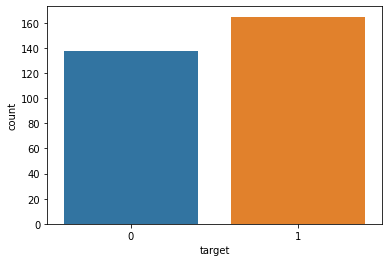

In [66]:
sns.countplot(df.target)

[Text(0, 0, ' typical angina'),
 Text(1, 0, 'atypical angina'),
 Text(2, 0, 'non-anginal pain'),
 Text(3, 0, 'asymptomatic')]

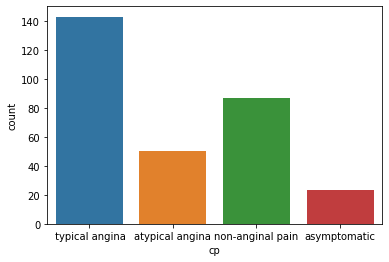

In [67]:
fig,ax =plt.subplots()
sns.countplot(df.cp,ax=ax)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels([' typical angina','atypical angina','non-anginal pain','asymptomatic'])

<AxesSubplot:xlabel='age', ylabel='count'>

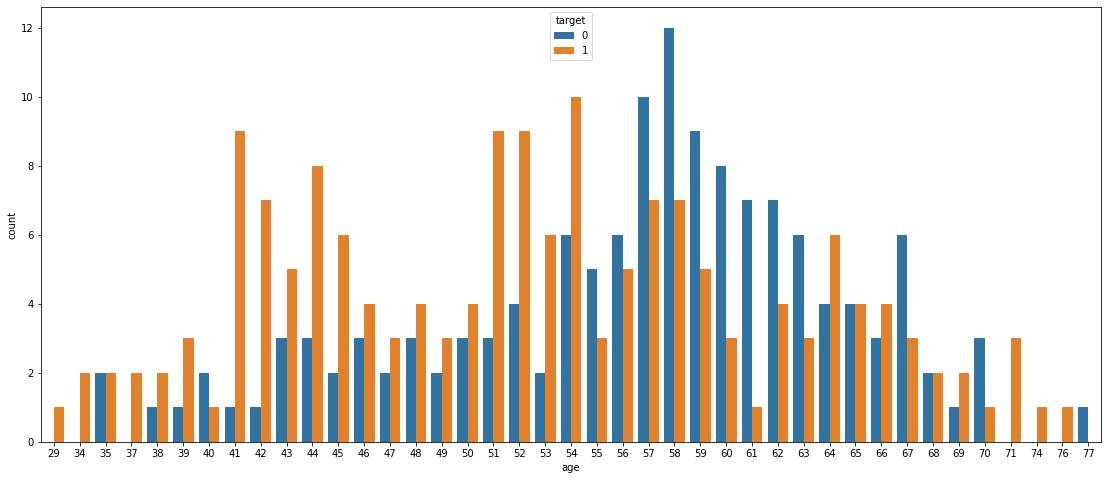

In [68]:
fig,ax= plt.subplots(figsize=(19,8))

sns.countplot(df.age,hue=df.target)

<AxesSubplot:xlabel='sex', ylabel='count'>

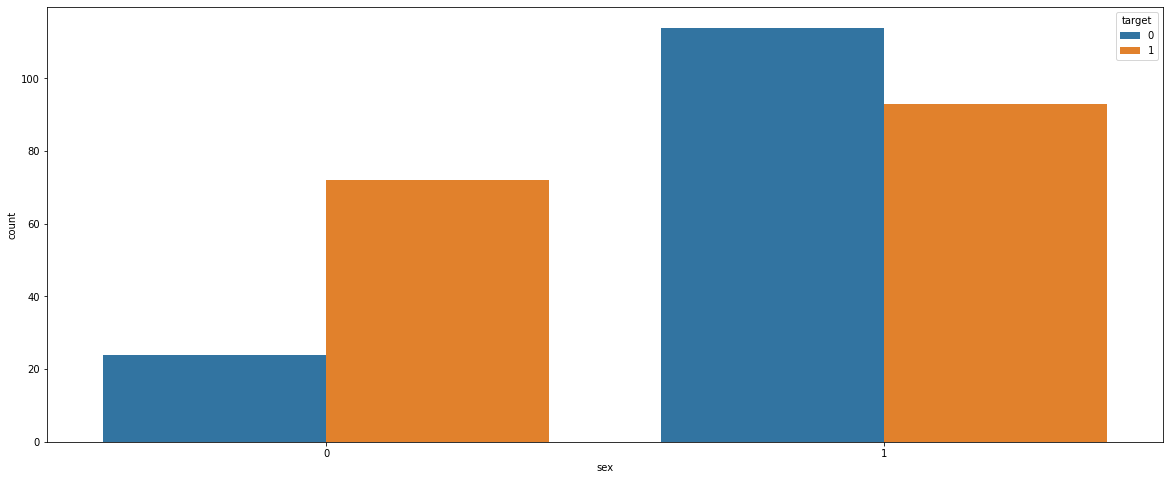

In [69]:
fig,ax=plt.subplots(figsize=(20,8))

sns.countplot(df.sex,hue=df.target)

<AxesSubplot:xlabel='slope', ylabel='count'>

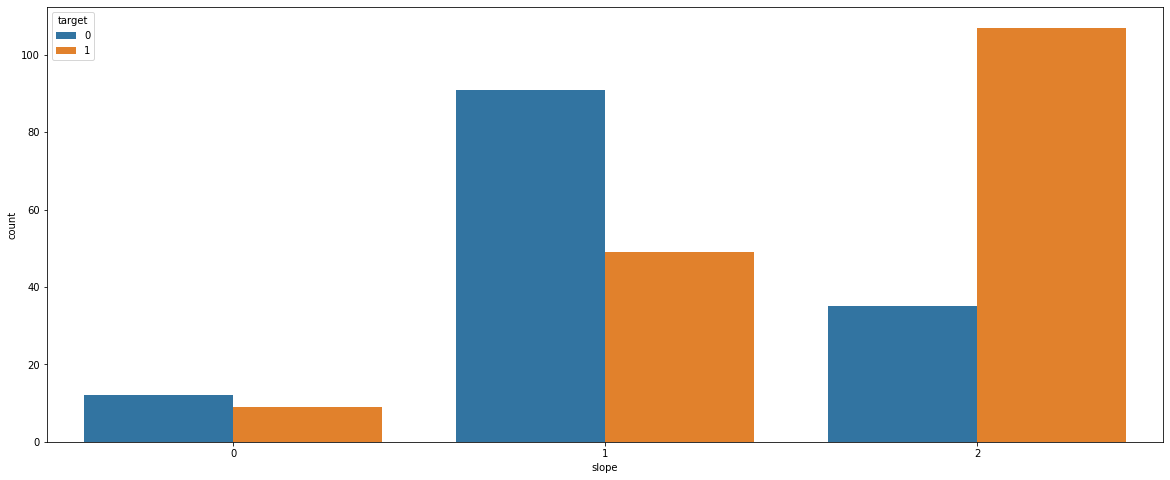

In [70]:
fig,ax=plt.subplots(figsize=(20,8))
sns.countplot(df.slope,hue=df.target)

<AxesSubplot:xlabel='exang', ylabel='count'>

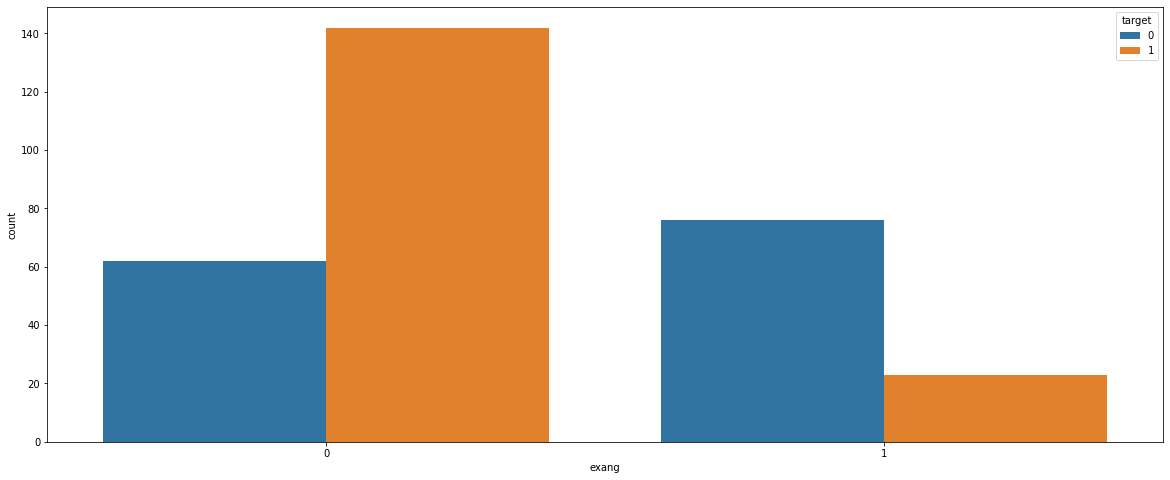

In [71]:
fig,ax=plt.subplots(figsize=(20,8))
sns.countplot(df.exang,hue=df.target)

<AxesSubplot:xlabel='thal', ylabel='count'>

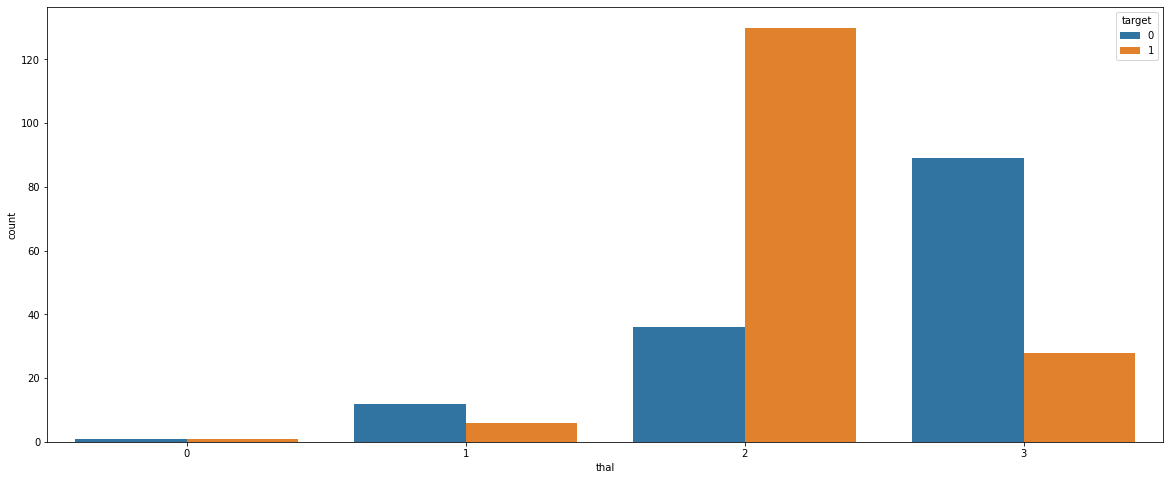

In [72]:
fig,ax=plt.subplots(figsize=(20,8))

sns.countplot(df.thal,hue=df.target)

<AxesSubplot:xlabel='age', ylabel='chol'>

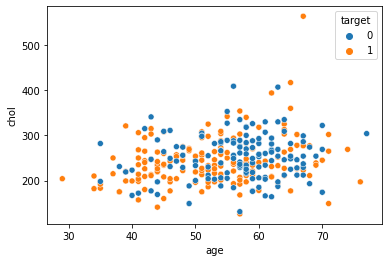

In [73]:
sns.scatterplot(df.age,df.chol,hue=df.target)

<AxesSubplot:xlabel='age', ylabel='thalach'>

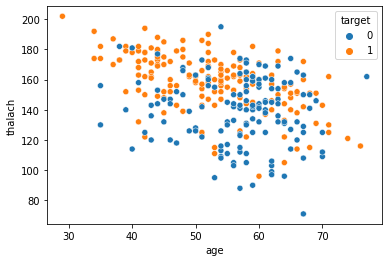

In [74]:
sns.scatterplot(df.age,df.thalach,hue=df.target)

<AxesSubplot:xlabel='exang', ylabel='thalach'>

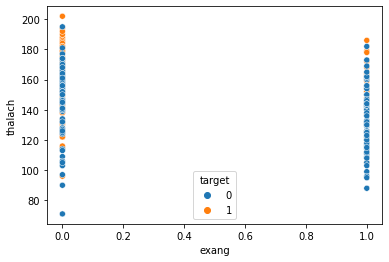

In [75]:
sns.scatterplot(df.exang,df.thalach,hue=df.target)

## Pre-Processing

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
cp = OneHotEncoder()

a = cp.fit_transform(df.cp.values.reshape(-1,1)).toarray()
a.shape

(303, 4)

In [79]:
restecg = OneHotEncoder()

b = restecg.fit_transform(df.restecg.values.reshape(-1,1)).toarray()
b.shape

(303, 3)

In [80]:
slope = OneHotEncoder()

c = slope.fit_transform(df.slope.values.reshape(-1,1)).toarray()

In [81]:
ca = OneHotEncoder()

d = ca.fit_transform(df.ca.values.reshape(-1,1)).toarray()

In [82]:
thal = OneHotEncoder()

e = thal.fit_transform(df.thal.values.reshape(-1,1)).toarray()

In [83]:
a=pd.DataFrame(a,columns=['cp_1','cp_2','cp_3','cp_4'])

a.drop('cp_4',axis=1,inplace=True)

a=a.astype(int)

In [84]:
a

,cp_1,cp_2,cp_3
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
298,1,0,0
299,0,0,0
300,1,0,0
301,1,0,0


In [85]:
b=pd.DataFrame(b,columns='resecg_1 resecg_2 resecg_3'.split())

b.drop('resecg_3',axis=1,inplace=True)

b=b.astype(int)

In [86]:
c=pd.DataFrame(c,columns='slope_1 slope_2 slope_3'.split())

c.drop('slope_3',axis=1,inplace=True)

c=c.astype(int)

In [87]:
d=pd.DataFrame(d,columns='ca_1 ca_2 ca_3 ca_4 ca_5'.split())

d.drop('ca_5',axis=1,inplace=True)

d=d.astype(int)

In [88]:
e=pd.DataFrame(e,columns='thal_1 thal_2 thal_3 thal_4'.split())

e.drop('thal_4',axis=1,inplace=True)

e=e.astype(int)

## Concating the final datasets

In [89]:
df.drop(['cp','restecg','slope','ca','thal'],axis=1,inplace=True)

In [90]:
df = pd.concat([df,a,b,c,d,e],axis=1)

## Prediction

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [92]:
y=df.target

In [93]:
df.drop('target',axis=1,inplace=True)

In [94]:
x=df

In [95]:
from sklearn.preprocessing import Normalizer

In [96]:
nm2=Normalizer()

x2 = nm2.fit_transform(x)

In [97]:
x2

array([[0.19745987, 0.00313428, 0.45447112, ..., 0.        , 0.00313428,
        0.        ],
       [0.10875006, 0.00293919, 0.3820948 , ..., 0.        , 0.        ,
        0.00293919],
       [0.13682871, 0.        , 0.43384712, ..., 0.        , 0.        ,
        0.00333729],
       ...,
       [0.23673477, 0.00348139, 0.50132068, ..., 0.        , 0.        ,
        0.        ],
       [0.25354016, 0.00444807, 0.57824948, ..., 0.        , 0.        ,
        0.        ],
       [0.17497015, 0.        , 0.39905472, ..., 0.        , 0.        ,
        0.00306965]])

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,random_state=101,test_size=0.2)

In [100]:
model=RandomForestClassifier(n_estimators=100,random_state=0)

model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [101]:
model.score(xtest,ytest)

0.8688524590163934

In [102]:
print(confusion_matrix(model.predict(xtest),ytest))

[[23  0]
 [ 8 30]]


In [116]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(model.predict(x),y))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       150
           1       0.78      0.84      0.81       153

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



## saving models

In [103]:
import joblib

In [107]:
joblib.dump(model,'model/model.pkl')

['model/model.pkl']

In [108]:
joblib.dump(ca,'model/ca.pkl')

['model/ca.pkl']

In [109]:
joblib.dump(restecg,'model/restecg.pkl')

['model/restecg.pkl']

In [110]:
joblib.dump(slope,'model/slope.pkl')

['model/slope.pkl']

In [111]:
joblib.dump(cp,'model/cp.pkl')

['model/cp.pkl']

In [112]:
joblib.dump(thal,'model/thal.pkl')

['model/thal.pkl']

In [113]:
joblib.dump(nm2,'model/normalize.pkl')

['model/normalize.pkl']

In [114]:
#to call use joblib.load

In [115]:
model.score(xtest,ytest)

0.8688524590163934